The accuracy score of K-Means: 0.3
Confusion matrix of K-Means:
 [[0 4 0]
 [3 0 0]
 [0 0 3]]
The accuracy score of EM (GMM): 0.3
Confusion matrix of EM (GMM):
 [[0 4 0]
 [3 0 0]
 [0 0 3]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


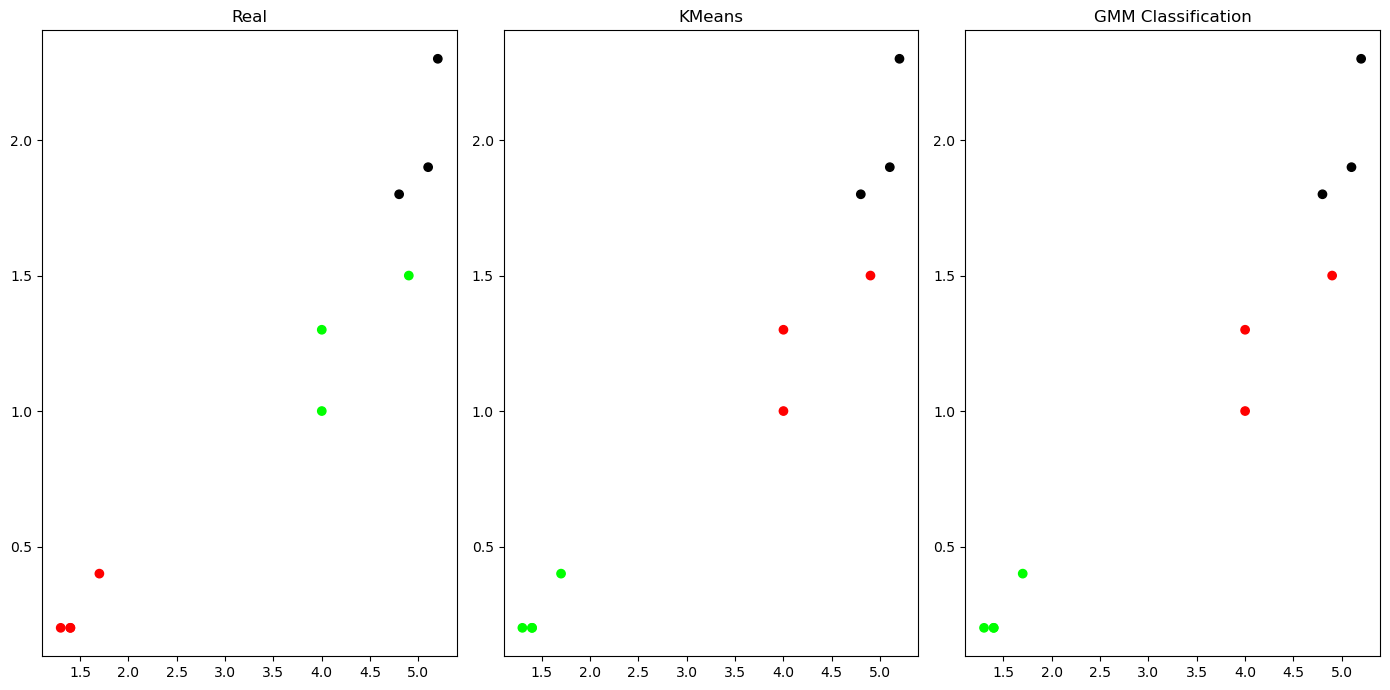

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
dataset = pd.read_csv("8.csv", names=names)

# Prepare input features and target labels
X = dataset.iloc[:, :-1]
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([label_map[c] for c in dataset['Class']])

# Color mapping for plots
colormap = np.array(['red', 'lime', 'black'])

# Plot Real Data
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
plt.title('Real')
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=colormap[y])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
plt.subplot(1, 3, 2)
plt.title('KMeans')
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=colormap[kmeans.labels_])
print('The accuracy score of K-Means:', metrics.accuracy_score(y, kmeans.labels_))
print('Confusion matrix of K-Means:\n', metrics.confusion_matrix(y, kmeans.labels_))

# Gaussian Mixture Model (EM Clustering)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
y_gmm = gmm.predict(X)
plt.subplot(1, 3, 3)
plt.title('GMM Classification')
plt.scatter(X['Petal_Length'], X['Petal_Width'], c=colormap[y_gmm])
print('The accuracy score of EM (GMM):', metrics.accuracy_score(y, y_gmm))
print('Confusion matrix of EM (GMM):\n', metrics.confusion_matrix(y, y_gmm))

plt.tight_layout()
plt.show()
